In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns


### Problem Statement = predict whether the water is potable or not we are going to use this dataset

In [2]:
df=pd.read_csv(r"C:\Users\sneha\OneDrive\Desktop\DA\water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.shape

(3276, 10)

In [4]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# DATA CLEANING 

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.ph.value_counts()

3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: ph, Length: 2785, dtype: int64

In [7]:
df.Sulfate.value_counts()

368.516441    1
301.230848    1
391.918229    1
330.905370    1
402.313427    1
             ..
359.710517    1
389.219586    1
337.231469    1
396.091917    1
359.948574    1
Name: Sulfate, Length: 2495, dtype: int64

In [8]:
df.Trihalomethanes.value_counts()

86.990970    1
84.798956    1
54.473935    1
77.730814    1
90.394895    1
            ..
73.723070    1
46.682597    1
70.168389    1
81.592362    1
78.698446    1
Name: Trihalomethanes, Length: 3114, dtype: int64

In [9]:
df.ph=df.ph.fillna(df.ph.median())
df.Sulfate=df.Sulfate.fillna(df.Sulfate.median())
df.Trihalomethanes=df.Trihalomethanes.fillna(df.Trihalomethanes.median())

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# MODEL 1

In [12]:
df.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0


In [13]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

# LOGISTIC REGRATION 

In [15]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [16]:
lg.fit(x_train,y_train)

LogisticRegression()

In [17]:
lg_p=lg.predict(x_test)
#lg_p

In [18]:
from sklearn.metrics import confusion_matrix
lg_cf=confusion_matrix(y_test,lg_p)
lg_cf 

array([[402,   0],
       [253,   1]], dtype=int64)

In [19]:
lg_ac=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_ac

61.4329268292683

In [20]:
a=f1_score(y_test,lg_p)
b=precision_score(y_test,lg_p)
c=recall_score(y_test,lg_p)

In [21]:
print(classification_report(y_test,lg_p))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       402
           1       1.00      0.00      0.01       254

    accuracy                           0.61       656
   macro avg       0.81      0.50      0.38       656
weighted avg       0.76      0.61      0.47       656



# DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [23]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt_p=dt.predict(x_test)
#dt_p

In [25]:
dt_cf=confusion_matrix(y_test,dt_p)
dt_cf

array([[260, 142],
       [135, 119]], dtype=int64)

In [26]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

57.77439024390244

In [27]:
a1=f1_score(y_test,dt_p)
b1=precision_score(y_test,dt_p)
c1=recall_score(y_test,dt_p)

In [28]:
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       402
           1       0.46      0.47      0.46       254

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656



# RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [30]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
rf_p=rf.predict(x_test)

In [32]:
rf_cf=confusion_matrix(y_test,rf_p)
rf_cf

array([[358,  44],
       [165,  89]], dtype=int64)

In [33]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

68.14024390243902

In [34]:
a2=f1_score(y_test,rf_p)
b2=precision_score(y_test,rf_p)
c2=recall_score(y_test,rf_p)

In [35]:
print(classification_report(y_test,rf_p))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       402
           1       0.67      0.35      0.46       254

    accuracy                           0.68       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.68      0.68      0.65       656



## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
knn_p=knn.predict(x_test)
#knn_p

In [39]:
knn_cf=confusion_matrix(y_test,knn_p)
knn_cf

array([[300, 102],
       [181,  73]], dtype=int64)

In [40]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

56.859756097560975

In [41]:
a3=f1_score(y_test,knn_p)
b3=precision_score(y_test,knn_p)
c3=recall_score(y_test,knn_p)

In [42]:
print(classification_report(y_test,knn_p))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       402
           1       0.42      0.29      0.34       254

    accuracy                           0.57       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.54      0.57      0.55       656



# XGB(XGBoost)

In [43]:
import xgboost 
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [44]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
xgb_p=xgb.predict(x_test)

In [46]:
xgb_cf=confusion_matrix(y_test,xgb_p)
xgb_cf

array([[319,  83],
       [131, 123]], dtype=int64)

In [47]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

67.3780487804878

In [48]:
a4=f1_score(y_test,xgb_p)
b4=precision_score(y_test,xgb_p)
c4=recall_score(y_test,xgb_p)

In [49]:
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       402
           1       0.60      0.48      0.53       254

    accuracy                           0.67       656
   macro avg       0.65      0.64      0.64       656
weighted avg       0.67      0.67      0.67       656



# SVM

In [50]:
from sklearn.svm import SVC
svm=SVC()

In [51]:
svm.fit(x_train,y_train)

SVC()

In [52]:
svm_p=svm.predict(x_test)

In [53]:
svm_cf=confusion_matrix(y_test,svm_p)
svm_cf

array([[402,   0],
       [254,   0]], dtype=int64)

In [54]:
svm_ac=svm_cf.diagonal().sum()/svm_cf.sum()*100
svm_ac

61.28048780487805

In [55]:
a5=f1_score(y_test,svm_p)
b5=precision_score(y_test,svm_p)
c5=recall_score(y_test,svm_p)

In [56]:
print(classification_report(y_test,svm_p))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       402
           1       0.00      0.00      0.00       254

    accuracy                           0.61       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.61      0.47       656



# NAVIE BAYES

In [57]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [58]:
nb.fit(x_train,y_train)

MultinomialNB()

In [59]:
nb_p=nb.predict(x_test)
#nb_p

In [60]:
nb_cf=confusion_matrix(y_test,nb_p)
nb_cf

array([[235, 167],
       [133, 121]], dtype=int64)

In [61]:
nb_ac=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_ac

54.268292682926834

In [62]:
a6=f1_score(y_test,nb_p)
b6=precision_score(y_test,nb_p)
c6=recall_score(y_test,nb_p)

In [63]:
print(classification_report(y_test,nb_p))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       402
           1       0.42      0.48      0.45       254

    accuracy                           0.54       656
   macro avg       0.53      0.53      0.53       656
weighted avg       0.55      0.54      0.55       656



In [64]:
algo=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB","SVM","Naive Bayes"]
accuracy=[lg_ac,dt_ac,rf_ac,knn_ac,xgb_ac,svm_ac,nb_ac]
f1=[a,a1,a2,a3,a4,a5,a6]
precision=[b,b1,b2,b3,b4,b5,b6]
recall=[c,c1,c2,c3,c4,c5,c6]

In [65]:
model1=pd.DataFrame({"Algorithm":algo,"Accuracy":accuracy,"F1-score":f1,"Precision":precision,"Recall":recall})
model1

,Algorithm,Accuracy,F1-score,Precision,Recall
0,Logistic Regression,61.432927,0.007843,1.000000,0.003937
1,Decision Tree,57.774390,0.462136,0.455939,0.468504
2,Random Forest,68.140244,0.459948,0.669173,0.350394
3,KNN,56.859756,0.340326,0.417143,0.287402
4,XGB,67.378049,0.534783,0.597087,0.484252
5,SVM,61.280488,0.000000,0.000000,0.000000
6,Naive Bayes,54.268293,0.446494,0.420139,0.476378


# class imbalance

# UNDER SAMPALING

In [66]:
df.shape

(3276, 10)

In [67]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

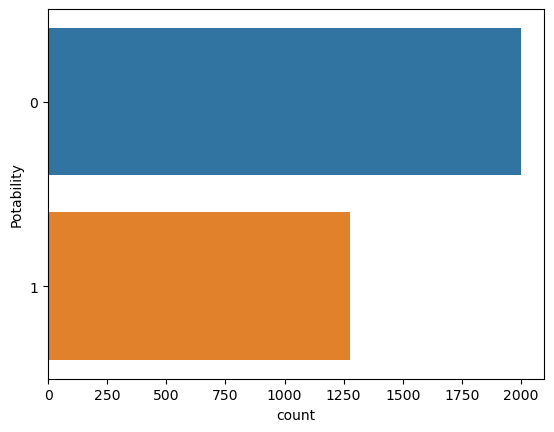

In [68]:
sns.countplot(data=df,y="Potability")
plt.show()

In [69]:
#c_0,c_1=df["Potability"].value_counts()
#c_0,c_1 #count of 0 and 1 class

In [70]:
#train_0=df[df["Potability"]==0]
#train_1=df[df["Potability"]==1]
#train_0.shape,train_1.shape

In [71]:
#train_0.head(2) #select the class which has more data

In [72]:
#class_1under=train_1.sample(c_1) #store the class which has less data as a sample


In [73]:
#class_1under.shape,train_0.shape

In [74]:
#class0_1=pd.concat([class_1under,train_0],axis=0) #concat to create df which has same number of sample
#class0_1.shape

In [75]:
#class0_1.Potability.value_counts()

In [76]:
#x1=class0_1.iloc[:,:-1]
#y1=class0_1.iloc[:,-1]
#x1.shape,y1.shape

# IMBlearn Under Sampeling

In [77]:
#import imblearn 
#from imblearn.under_sampling import RandomUnderSampler

In [78]:
#df.Potability.value_counts()

In [79]:
#d_x=df.iloc[:,:-1]
#d_y=df.iloc[:,-1]

In [80]:
#a1=RandomUnderSampler(sampling_strategy="all")

In [81]:
#d_x.shape,d_y.shape

In [82]:
#x1,y1=a1.fit_resample(d_x,d_y)
#x1.shape,y1.shape

# NEAR MISS UNDER SAMPALING

In [83]:
#from imblearn.under_sampling import NearMiss
#nm=NearMiss()

In [84]:
#hr_x=df.iloc[:,:-1]
#hr_y=df.iloc[:,-1]

In [85]:
#hr_y.value_counts()

In [86]:
#x1,y1=nm.fit_resample(hr_x,hr_y)

In [87]:
#x1.shape,y1.shape

# OVERSAMPLING

In [88]:
c_0,c_1=df["Potability"].value_counts()
c_0,c_1 

(1998, 1278)

In [89]:
train_0=df[df["Potability"]==0]
train_1=df[df["Potability"]==1]
train_0.shape,train_1.shape

((1998, 10), (1278, 10))

In [90]:
class_1over=train_1.sample(c_0,replace=True)

In [91]:
class_1over.shape,train_0.shape

((1998, 10), (1998, 10))

In [92]:
df1=pd.concat([class_1over,train_0],axis=0)
df1.shape

(3996, 10)

In [93]:
df1.Potability.value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

In [94]:
x1=df1.iloc[:,:-1]
y1=df1.iloc[:,-1]

In [95]:
x1.shape,y1.shape

((3996, 9), (3996,))

# IMBLEARN Oversampaling

In [96]:
#from imblearn.over_sampling import RandomOverSampler

In [97]:
#x3=df.iloc[:,:-1]
#y3=df.iloc[:,-1]

In [98]:
#a2=RandomOverSampler(random_state=42)
#x1,y1=a2.fit_resample(x3,y3)

In [99]:
#x1.shape,y1.shape

# SMOTE

In [100]:
#hr_x=df.iloc[:,:-1]
#hr_y=df.iloc[:,-1]

In [101]:
#hr_y.value_counts()

In [102]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()

In [103]:
#x1,y1=smote.fit_resample(hr_x,hr_y)

In [104]:
#x1.shape,y1.shape

In [105]:
#y1.value_counts()

In [106]:
x_tr,x_te,y_tr,y_te=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [107]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((3196, 9), (800, 9), (3196,), (800,))


# OUTLIER

<Axes: >

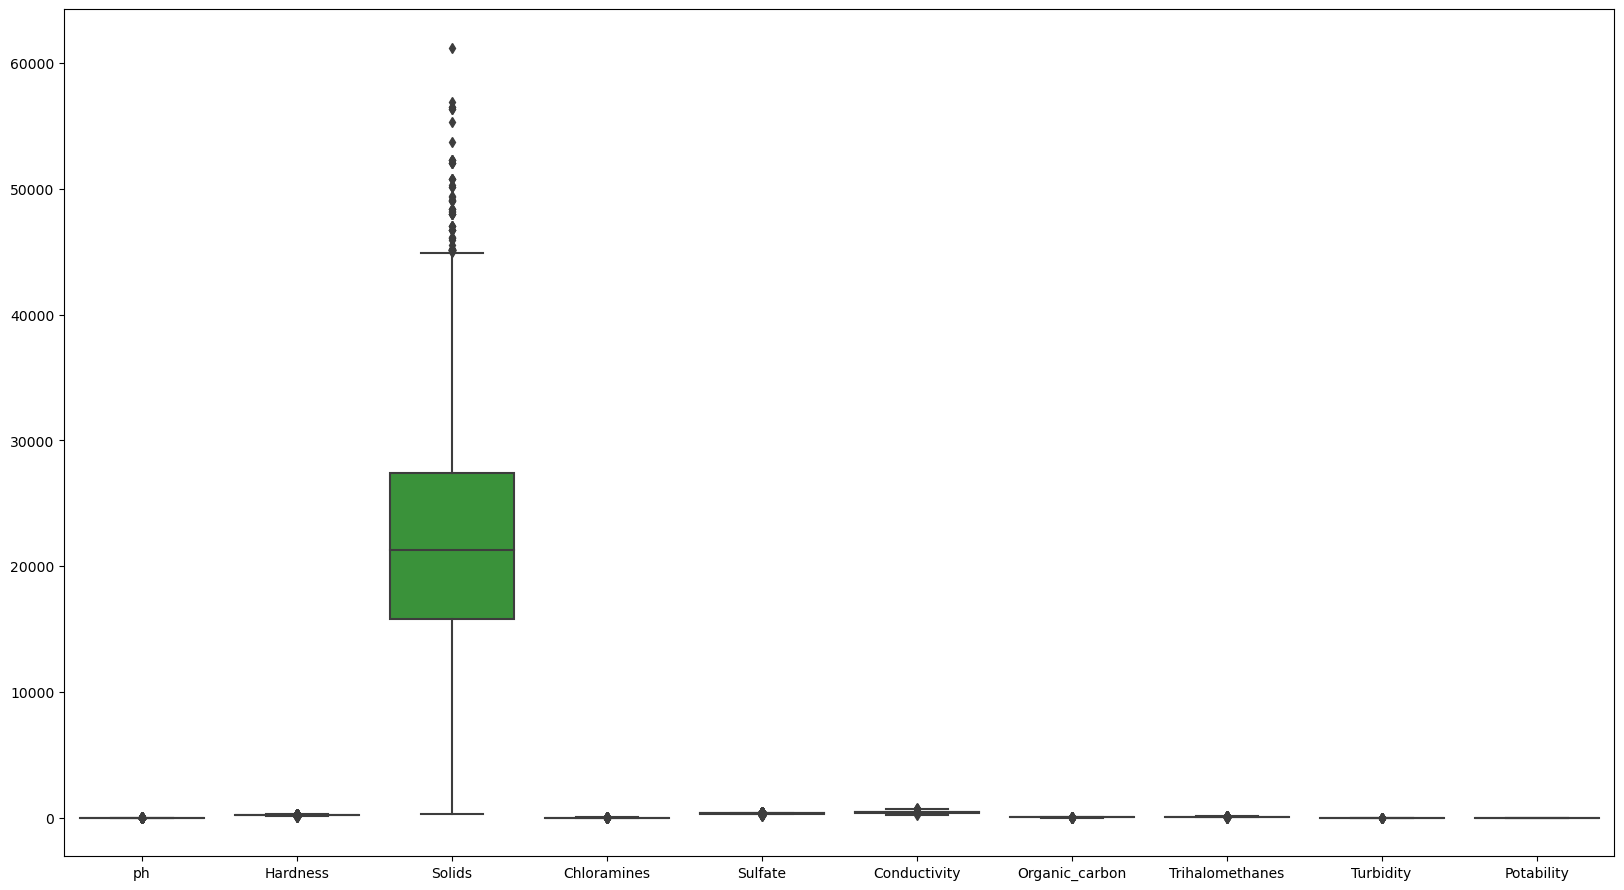

In [108]:
fig=plt.figure(figsize=(20,11))
sns.boxplot(data=df1)

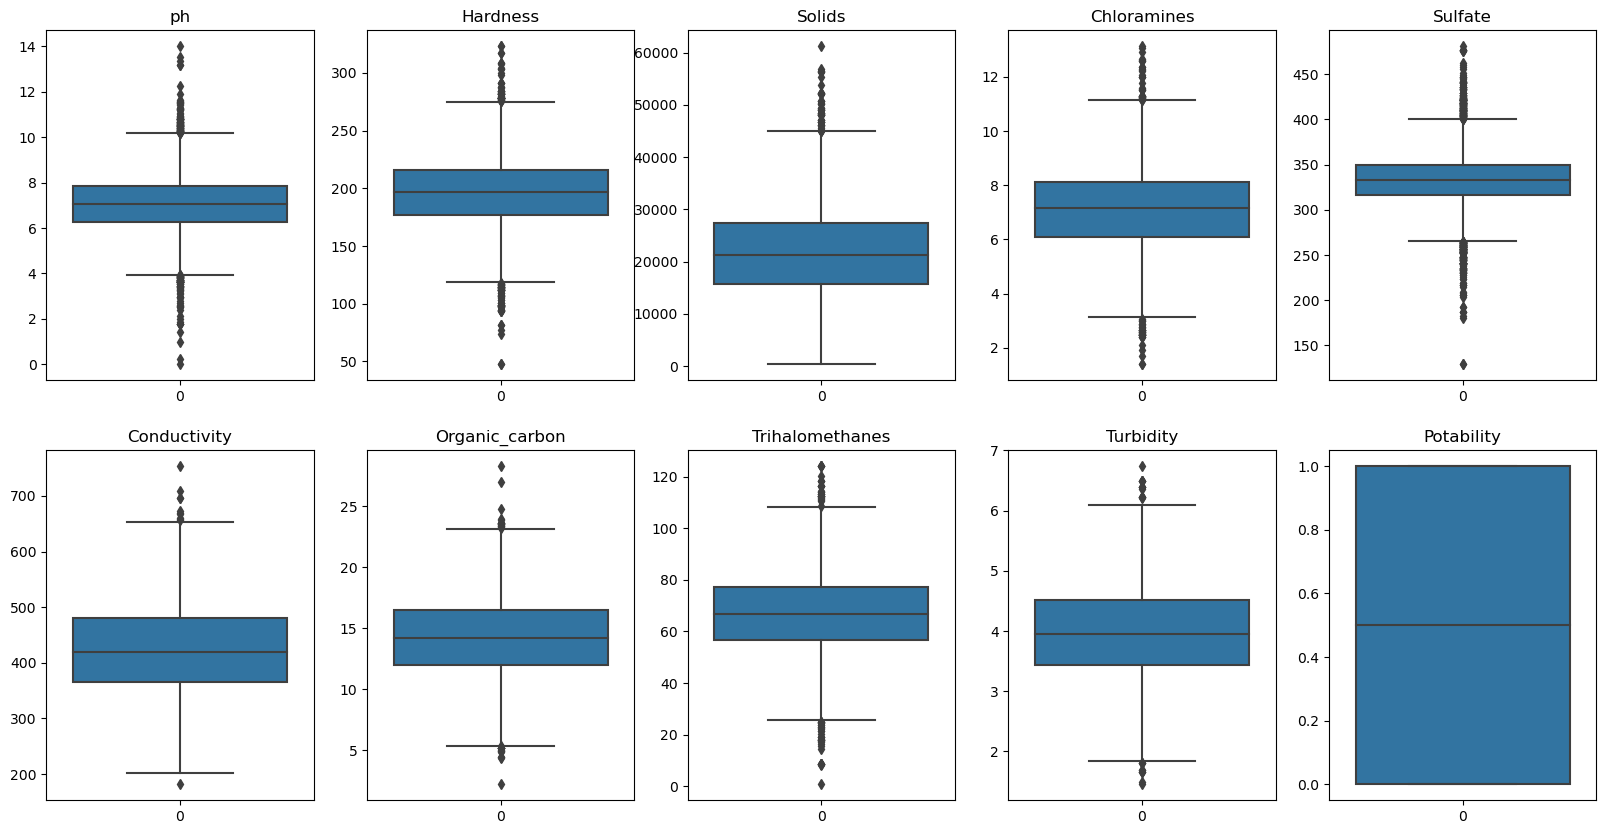

In [109]:
num_cols=df1.columns
fig,ax=plt.subplots(2,5,figsize=(20,10))
index=0
ax=ax.flatten()
for i in df1:
        sns.boxplot(df1[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1
plt.show()

In [110]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="ph")

In [111]:
#df1.ph.hist()

In [112]:
df1.ph.describe()

count    3996.000000
mean        7.070807
std         1.439954
min         0.000000
25%         6.280960
50%         7.036752
75%         7.847829
max        14.000000
Name: ph, dtype: float64

In [113]:
ub1=df1["ph"].mean()+3*df1["ph"].std()
lb1=df1["ph"].mean()-3*df1["ph"].std()
print(ub1,lb1)

11.390669283184835 2.750944011038193


In [114]:
df1.loc[df1["ph"]>ub1,"ph"]=ub1
df1.loc[df1["ph"]<lb1,"ph"]=lb1

In [115]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Hardness")

In [116]:
#df1.Hardness.hist()

In [117]:
df1.Hardness.describe()

count    3996.000000
mean      196.101618
std        33.440604
min        47.432000
25%       176.749219
50%       196.615992
75%       216.051143
max       323.124000
Name: Hardness, dtype: float64

In [118]:
ub2=df1["Hardness"].mean()+3*df1["Hardness"].std()
lb2=df1["Hardness"].mean()-3*df1["Hardness"].std()
print(ub2,lb2)

296.4234293892613 95.77980711861157


In [119]:
df1.loc[df1["Hardness"]>ub2,"Hardness"]=ub2
df1.loc[df1["Hardness"]<lb2,"Hardness"]=lb2

In [120]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Solids")

In [121]:
#df1.Solids.hist()

In [122]:
df1.Solids.describe()

count     3996.000000
mean     22227.191861
std       8824.482301
min        320.942611
25%      15761.088680
50%      21293.359254
75%      27418.193793
max      61227.196008
Name: Solids, dtype: float64

In [123]:
ub3=df1["Solids"].mean()+3*df1["Solids"].std()
print(ub3)

48700.63876511776


In [124]:
df1.loc[df1["Solids"]>ub3,"Solids"]=ub3

In [125]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Chloramines")

In [126]:
#df1.Chloramines.hist()

In [127]:
df1.Chloramines.describe()


count    3996.000000
mean        7.133075
std         1.596134
min         1.390871
25%         6.106715
50%         7.140741
75%         8.116104
max        13.127000
Name: Chloramines, dtype: float64

In [128]:
ub4=df1["Chloramines"].mean()+3*df1["Chloramines"].std()
lb4=df1["Chloramines"].mean()-3*df1["Chloramines"].std()
print(ub4,lb4)

11.921475956297364 2.3446735248308395


In [129]:
df1.loc[df1["Chloramines"]>ub4,"Chloramines"]=ub4
df1.loc[df1["Chloramines"]<lb4,"Chloramines"]=lb4


In [130]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Sulfate")


In [131]:
#df1.Sulfate.hist()


In [132]:
df1.Sulfate.describe()

count    3996.000000
mean      332.464012
std        37.588081
min       129.000000
25%       315.867923
50%       333.073546
75%       349.655175
max       481.030642
Name: Sulfate, dtype: float64

In [133]:
ub5=df1["Sulfate"].mean()+3*df1["Sulfate"].std()
lb5=df1["Sulfate"].mean()-3*df1["Sulfate"].std()
print(ub5,lb5)

445.22825436007236 219.69977059277684


In [134]:
df1.loc[df1["Sulfate"]>ub5,"Sulfate"]=ub5
df1.loc[df1["Sulfate"]<lb5,"Sulfate"]=lb5

In [135]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Conductivity")

In [136]:
#df1.Conductivity.hist()

In [137]:
df1.Conductivity.describe()

count    3996.000000
mean      424.958239
std        81.179140
min       181.483754
25%       365.148152
50%       419.725549
75%       480.313090
max       753.342620
Name: Conductivity, dtype: float64

In [138]:
ub6=df1["Conductivity"].mean()+3*df1["Conductivity"].std()
lb6=df1["Conductivity"].mean()-3*df1["Conductivity"].std()
print(ub6,lb6)

668.4956600520145 181.4208175599186


In [139]:
df1.loc[df1["Conductivity"]>ub6,"Conductivity"]=ub6
df1.loc[df1["Conductivity"]<lb6,"Conductivity"]=lb6

In [140]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Organic_carbon")

In [141]:
#df1.Organic_carbon.hist()

In [142]:
df1.Organic_carbon.describe()

count    3996.000000
mean       14.225763
std         3.319473
min         2.200000
25%        12.010676
50%        14.190565
75%        16.471988
max        28.300000
Name: Organic_carbon, dtype: float64

In [143]:
ub7=df1["Organic_carbon"].mean()+3*df1["Organic_carbon"].std()
lb7=df1["Organic_carbon"].mean()-3*df1["Organic_carbon"].std()

print(ub7,lb7)

24.18418212721442 4.267344558766103


In [144]:
df1.loc[df1["Organic_carbon"]>ub7,"Organic_carbon"]=ub7
df1.loc[df1["Organic_carbon"]<lb7,"Organic_carbon"]=lb7

In [145]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Trihalomethanes")


In [146]:
#df1.Trihalomethanes.hist()


In [147]:
df1.Trihalomethanes.describe()


count    3996.000000
mean       66.816496
std        16.235235
min         0.738000
25%        56.483597
50%        66.622485
75%        77.324282
max       124.000000
Name: Trihalomethanes, dtype: float64

In [148]:
ub8=df1["Trihalomethanes"].mean()+3*df1["Trihalomethanes"].std()
lb8=df1["Trihalomethanes"].mean()-3*df1["Trihalomethanes"].std()
print(ub8,lb8)


115.52219998687526 18.11079215728806


In [149]:
df1.loc[df1["Trihalomethanes"]>ub8,"Trihalomethanes"]=ub8
df1.loc[df1["Trihalomethanes"]<lb8,"Trihalomethanes"]=lb8

In [150]:
#fig=plt.figure(figsize=(5,5))
#sns.boxplot(data=df1,y="Turbidity")


In [151]:
#df1.Turbidity.hist()


In [152]:
df1.Turbidity.describe()


count    3996.000000
mean        3.959781
std         0.781111
min         1.450000
25%         3.438280
50%         3.947064
75%         4.506540
max         6.739000
Name: Turbidity, dtype: float64

In [153]:
ub9=df1["Turbidity"].mean()+3*df1["Turbidity"].std()
lb9=df1["Turbidity"].mean()-3*df1["Turbidity"].std()
print(ub9,lb9)


6.303115320412498 1.6164473560105859


In [154]:
df1.loc[df1["Turbidity"]>ub9,"Turbidity"]=ub9
df1.loc[df1["Turbidity"]<lb9,"Turbidity"]=lb9


In [155]:
df1.skew()

ph                 0.058071
Hardness          -0.039327
Solids             0.525714
Chloramines        0.001976
Sulfate            0.031143
Conductivity       0.275176
Organic_carbon    -0.028050
Trihalomethanes   -0.027259
Turbidity          0.000035
Potability         0.000000
dtype: float64

# VISUALIZATION

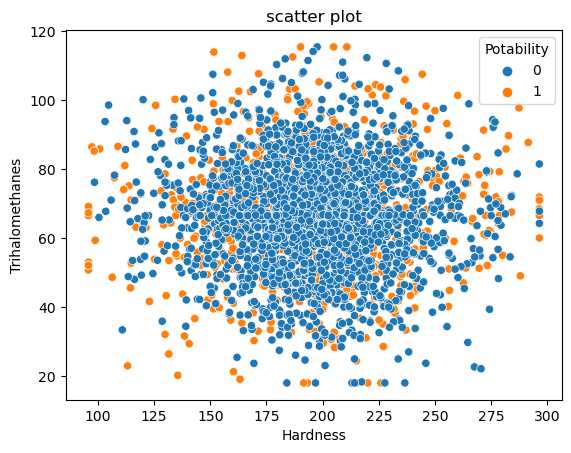

In [156]:
sns.scatterplot(x='Hardness', y='Trihalomethanes', hue='Potability', data=df1)
plt.title('scatter plot')
plt.show()

In [275]:
df1.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
298,5.418504,187.776809,35902.715684,4.357088,333.073546,454.520296,6.374070,103.373005,4.506540,1
3236,4.767472,256.449917,48007.868134,5.773180,333.073546,590.429550,16.541561,44.938586,3.893378,1
1097,7.808012,179.799917,17037.725367,6.378364,348.071511,590.060546,12.092499,81.592362,4.165550,1


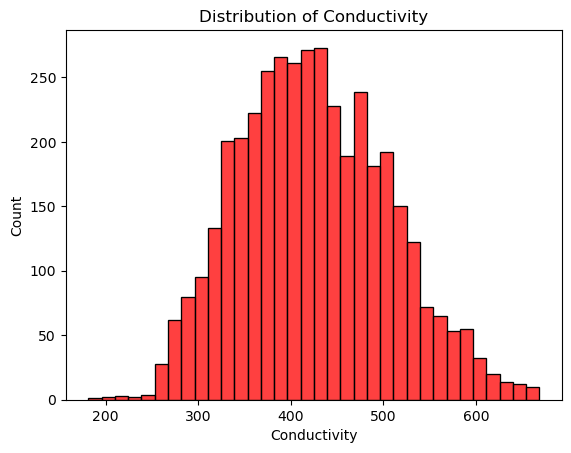

In [273]:
# Histogram
sns.histplot(df1.Conductivity,color="red")
plt.title(f'Distribution of Conductivity')
plt.show()

In [157]:
d2=df1.corr()
d2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.065715,-0.044180,-0.015533,-0.024107,0.031836,0.044443,-0.003678,-0.038761,-0.004307
Hardness,0.065715,1.000000,-0.059307,-0.014127,-0.064893,-0.026630,-0.007216,-0.003523,0.010598,-0.018738
Solids,-0.044180,-0.059307,1.000000,-0.092580,-0.190812,0.003794,0.021604,0.001241,0.004545,0.050431
Chloramines,-0.015533,-0.014127,-0.092580,1.000000,0.049960,-0.023433,-0.010934,0.038233,0.011680,0.024994
Sulfate,-0.024107,-0.064893,-0.190812,0.049960,1.000000,-0.013195,0.014659,-0.022849,-0.016819,-0.045693
Conductivity,0.031836,-0.026630,0.003794,-0.023433,-0.013195,1.000000,0.032578,0.028208,-0.008114,-0.021640
Organic_carbon,0.044443,-0.007216,0.021604,-0.010934,0.014659,0.032578,1.000000,-0.020172,-0.024789,-0.041131
Trihalomethanes,-0.003678,-0.003523,0.001241,0.038233,-0.022849,0.028208,-0.020172,1.000000,-0.023960,0.030654
Turbidity,-0.038761,0.010598,0.004545,0.011680,-0.016819,-0.008114,-0.024789,-0.023960,1.000000,-0.007888
Potability,-0.004307,-0.018738,0.050431,0.024994,-0.045693,-0.021640,-0.041131,0.030654,-0.007888,1.000000


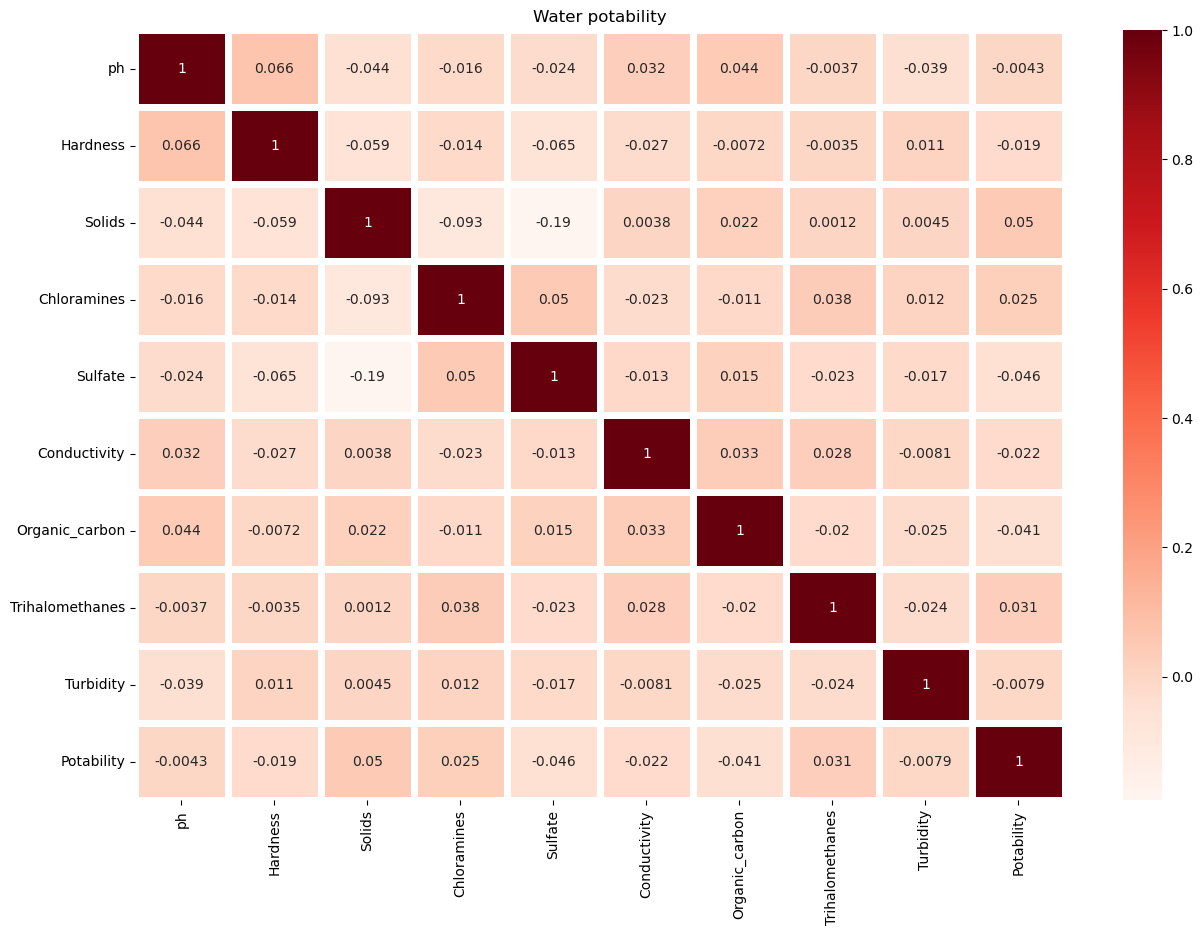

In [159]:
# Heat Map
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(d2,linewidth=5,annot=True,cmap=plt.cm.Reds)
plt.title("Water potability")
plt.show()

# LOGISTIC

In [160]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [161]:
lg_p2=lg.predict(x_te)
#lg_p2

In [162]:
lg_c2=confusion_matrix(y_te,lg_p2)
lg_c2

array([[234, 170],
       [220, 176]], dtype=int64)

In [163]:
lg_ac2=lg_c2.diagonal().sum()/lg_c2.sum()*100
lg_ac2

51.24999999999999

In [164]:
print(classification_report(y_te,lg_p2))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55       404
           1       0.51      0.44      0.47       396

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



In [165]:
lg_f2=f1_score(y_te,lg_p2)
lg_pr2=precision_score(y_te,lg_p2)
lg_r2=recall_score(y_te,lg_p2)
print(lg_f2,lg_pr2,lg_r2)

0.4743935309973045 0.5086705202312138 0.4444444444444444


# DT

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()


In [167]:
dt1.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [168]:
dt1_p2=dt1.predict(x_te)
#dt1_p2

In [169]:
dt1_c2=confusion_matrix(y_te,dt1_p2)
dt1_c2

array([[282, 122],
       [ 57, 339]], dtype=int64)

In [170]:
dt1_ac2=dt1_c2.diagonal().sum()/dt1_c2.sum()*100
dt1_ac2

77.625

In [171]:
print(classification_report(y_te,dt1_p2))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       404
           1       0.74      0.86      0.79       396

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.77       800



In [172]:
dt1_f2=f1_score(y_te,dt1_p2)
dt1_pr2=precision_score(y_te,dt1_p2)
dt1_r2=recall_score(y_te,dt1_p2)
print(dt1_f2,dt1_pr2,dt1_r2)

0.7911318553092181 0.735357917570499 0.8560606060606061


# RF

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

In [174]:
rf1.fit(x_tr,y_tr)

RandomForestClassifier()

In [175]:
rf1_p2=rf1.predict(x_te)

In [176]:
rf1_c2=confusion_matrix(y_te,rf1_p2)
rf1_c2

array([[352,  52],
       [ 60, 336]], dtype=int64)

In [177]:
rf1_ac2=rf1_c2.diagonal().sum()/rf1_c2.sum()*100
rf1_ac2

86.0

In [178]:
print(classification_report(y_te,rf1_p2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       404
           1       0.87      0.85      0.86       396

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [179]:
rf1_f2=f1_score(y_te,rf1_p2)
rf1_pr2=precision_score(y_te,rf1_p2)
rf1_r2=recall_score(y_te,rf1_p2)
print(rf1_f2,rf1_pr2,rf1_r2)

0.8571428571428571 0.865979381443299 0.8484848484848485


# KNN

In [180]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier()

In [181]:
knn_p2=knn.predict(x_te)

In [182]:
knn_c2=confusion_matrix(y_te,knn_p2)
knn_c2

array([[214, 190],
       [140, 256]], dtype=int64)

In [183]:
knn_ac2=knn_c2.diagonal().sum()/knn_c2.sum()*100
knn_ac2

58.75

In [184]:
print(classification_report(y_te,knn_p2))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       404
           1       0.57      0.65      0.61       396

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.59      0.59      0.59       800



In [185]:
knn_f2=f1_score(y_te,knn_p2)
knn_pr2=precision_score(y_te,knn_p2)
knn_r2=recall_score(y_te,knn_p2)
print(knn_f2,knn_pr2,knn_r2)

0.6080760095011877 0.5739910313901345 0.6464646464646465


# Navie Bayes

In [186]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [187]:
nb_p2=nb.predict(x_te)

In [188]:
nb_c2=confusion_matrix(y_te,nb_p2)
nb_c2

array([[231, 173],
       [226, 170]], dtype=int64)

In [189]:
nb_ac2=nb_c2.diagonal().sum()/nb_c2.sum()*100
nb_ac2

50.125

In [190]:
print(classification_report(y_te,nb_p2))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       404
           1       0.50      0.43      0.46       396

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



In [191]:
nb_f2=f1_score(y_te,nb_p2)
nb_pr2=precision_score(y_te,nb_p2)
nb_r2=recall_score(y_te,nb_p2)
print(nb_f2,nb_pr2,nb_r2)

0.46008119079837617 0.4956268221574344 0.4292929292929293


# XGB

In [192]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [193]:
xgb_p2=xgb.predict(x_te)

In [194]:
xgb_c2=confusion_matrix(y_te,xgb_p2)
xgb_c2

array([[306,  98],
       [ 51, 345]], dtype=int64)

In [195]:
xgb_ac2=xgb_c2.diagonal().sum()/xgb_c2.sum()*100
xgb_ac2

81.375

In [196]:
print(classification_report(y_te,xgb_p2))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       404
           1       0.78      0.87      0.82       396

    accuracy                           0.81       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.81      0.81       800



In [197]:
xgb_f2=f1_score(y_te,xgb_p2)
xgb_pr2=precision_score(y_te,xgb_p2)
xgb_r2=recall_score(y_te,xgb_p2)
print(xgb_f2,xgb_pr2,xgb_r2)

0.8224076281287246 0.7787810383747178 0.8712121212121212


# SVM

In [198]:
from sklearn.svm import SVC
svm=SVC()

In [199]:
svm.fit(x_tr,y_tr)

SVC()

In [200]:
svm_p2=svm.predict(x_te)

In [201]:
svm_cf2=confusion_matrix(y_te,svm_p2)
svm_cf2

array([[266, 138],
       [263, 133]], dtype=int64)

In [202]:
svm_ac2=svm_cf2.diagonal().sum()/svm_cf2.sum()*100
svm_ac2

49.875

In [203]:
svm_f2=f1_score(y_te,svm_p2)
svm_pr2=precision_score(y_te,svm_p2)
svm_r2=recall_score(y_te,svm_p2)
print(svm_f2,svm_pr2,svm_r2)

0.3988005997001499 0.4907749077490775 0.33585858585858586


In [204]:
L12=["Logistic","DT","RF","XGB","NB","SVM","KNN"]
L22=[lg_ac2,dt1_ac2,rf1_ac2,xgb_ac2,nb_ac2,svm_ac2,knn_ac2]
L32=[lg_pr2,dt1_pr2,rf1_pr2,xgb_pr2,nb_pr2,svm_pr2,knn_pr2]
L42=[lg_r2,dt1_r2,rf1_r2,xgb_r2,nb_r2,svm_r2,knn_r2]
L52=[lg_f2,dt1_f2,rf1_f2,xgb_f2,nb_f2,svm_f2,knn_f2]

In [205]:
df2=pd.DataFrame({"Model":L12,"Accuracy":L22,"Precision":L32,"Recall":L42,"f1_score":L52})
df2

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,51.250,0.508671,0.444444,0.474394
1,DT,77.625,0.735358,0.856061,0.791132
2,RF,86.000,0.865979,0.848485,0.857143
3,XGB,81.375,0.778781,0.871212,0.822408
4,NB,50.125,0.495627,0.429293,0.460081
5,SVM,49.875,0.490775,0.335859,0.398801
6,KNN,58.750,0.573991,0.646465,0.608076


# FEATURE SELECTION

In [206]:
#dt1.feature_importances_

In [207]:
#d_1=pd.DataFrame(dt1.feature_importances_)
#d_1

In [208]:
#d1=pd.DataFrame({"Feature_Score":list(dt1.feature_importances_),"columns":list(df1.iloc[:,:-1].columns)})
#d1

In [209]:
#d2=df1.drop(["ph","Solids","Sulfate"],axis=1)
#d2.head(1)

In [210]:
#d1_x=d2.iloc[:,:-1]
#d1_y=d2.iloc[:,-1]

In [211]:
#d1_x.head(1)

In [212]:
#x_tr1,x_te1,y_tr1,y_te1=train_test_split(d1_x,d1_y,test_size=0.2,random_state=100)
#x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

# RANDOM FOREST CLASSIFIER

In [213]:
#rf1.feature_importances_


In [214]:
#rc=pd.DataFrame(rf1.feature_importances_)
#rc


In [215]:
#r1=pd.DataFrame({"Feature_Score":list(rf1.feature_importances_),"columns":list(df1.iloc[:,:-1].columns)})
#r1

In [216]:
#r2=proj1.drop(["ph","Solids","Sulfate"],axis=1)
#r2.head(1)

In [217]:
#r1_x=r2.iloc[:,:-1]
#r1_y=r2.iloc[:,-1]

In [218]:
#r1_x.head(1)

In [219]:
#x_tr1,x_te1,y_tr1,y_te1=train_test_split(r1_x,r1_y,test_size=0.2,random_state=101)
#x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

# Recurssive Feature Elimination

In [220]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [221]:
rfe=RFE(dtree,n_features_to_select=6)  

In [222]:
rfe.fit(df1.iloc[:,:-1],df1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)

In [223]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False])

In [224]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(df1.iloc[:,:-1].columns)})
f1

,feature,col
0,True,ph
1,True,Hardness
2,True,Solids
3,True,Chloramines
4,True,Sulfate
5,True,Conductivity
6,False,Organic_carbon
7,False,Trihalomethanes
8,False,Turbidity


In [225]:
f2=df1.drop(['Organic_carbon','Trihalomethanes','Turbidity'],axis=1)
f2.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Potability
298,5.418504,187.776809,35902.715684,4.357088,333.073546,454.520296,1


In [226]:
f1_x=f2.iloc[:,:-1]
f1_y=f2.iloc[:,-1]

In [227]:
f1_x.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity
298,5.418504,187.776809,35902.715684,4.357088,333.073546,454.520296


In [228]:
x_tr1,x_te1,y_tr1,y_te1=train_test_split(f1_x,f1_y,test_size=0.2,random_state=101)
x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

((3196, 6), (800, 6), (3196,), (800,))

# Logistic

In [229]:
lg.fit(x_tr1,y_tr1)

LogisticRegression()

In [230]:
lg_p3=lg.predict(x_te1)
#lg_p3

In [231]:
lg_c3=confusion_matrix(y_te1,lg_p3)
lg_c3

array([[230, 174],
       [221, 175]], dtype=int64)

In [232]:
lg_ac3=lg_c3.diagonal().sum()/lg_c3.sum()*100
lg_ac3

50.625

In [233]:
print(classification_report(y_te1,lg_p3))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       404
           1       0.50      0.44      0.47       396

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.51      0.51      0.50       800



In [234]:
lg_f3=f1_score(y_te1,lg_p3)
lg_pr3=precision_score(y_te1,lg_p3)
lg_r3=recall_score(y_te1,lg_p3)
print(lg_f3,lg_pr3,lg_r3)

0.4697986577181208 0.501432664756447 0.44191919191919193


# DT

In [235]:
dt.fit(x_tr1,y_tr1)

DecisionTreeClassifier()

In [236]:
dt_p3=dt.predict(x_te1)
#dt_p3

In [237]:
dt_c3=confusion_matrix(y_te1,dt_p3)
dt_c3

array([[288, 116],
       [ 71, 325]], dtype=int64)

In [238]:
dt_ac3=dt_c3.diagonal().sum()/dt_c3.sum()*100
dt_ac3

76.625

In [239]:
print(classification_report(y_te1,dt_p3))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       404
           1       0.74      0.82      0.78       396

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [240]:
dt_f3=f1_score(y_te1,dt_p3)
dt_pr3=precision_score(y_te1,dt_p3)
dt_r3=recall_score(y_te1,dt_p3)
print(dt_f3,dt_pr3,dt_r3)

0.7765830346475507 0.7369614512471655 0.8207070707070707


# RF

In [241]:
rf.fit(x_tr1,y_tr1)

RandomForestClassifier()

In [242]:
rf_p3=rf.predict(x_te1)
#rf_p3

In [243]:
rf_c3=confusion_matrix(y_te1,rf_p3)
rf_c3 

array([[338,  66],
       [ 63, 333]], dtype=int64)

In [244]:
rf_ac3=rf_c3.diagonal().sum()/rf_c3.sum()*100
rf_ac3

83.875

In [245]:
print(classification_report(y_te1,rf_p3))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       404
           1       0.83      0.84      0.84       396

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



In [246]:
rf_f3=f1_score(y_te1,rf_p3)
rf_pr3=precision_score(y_te1,rf_p3)
rf_r3=recall_score(y_te1,rf_p3)
print(rf_f3,rf_pr3,rf_r3)

0.8377358490566038 0.8345864661654135 0.8409090909090909


# KNN

In [247]:
knn.fit(x_tr1,y_tr1)

KNeighborsClassifier()

In [248]:
knn_p3=knn.predict(x_te1)
#knn_p3

In [249]:
knn_c3=confusion_matrix(y_te1,knn_p3)
knn_c3 

array([[212, 192],
       [147, 249]], dtype=int64)

In [250]:
knn_ac3=knn_c3.diagonal().sum()/knn_c3.sum()*100
knn_ac3

57.62500000000001

In [251]:
print(classification_report(y_te1,knn_p3))

              precision    recall  f1-score   support

           0       0.59      0.52      0.56       404
           1       0.56      0.63      0.59       396

    accuracy                           0.58       800
   macro avg       0.58      0.58      0.58       800
weighted avg       0.58      0.58      0.58       800



In [252]:
knn_f3=f1_score(y_te1,knn_p3)
knn_pr3=precision_score(y_te1,knn_p3)
knn_r3=recall_score(y_te1,knn_p3)
print(knn_f3,knn_pr3,knn_r3)

0.5949820788530465 0.564625850340136 0.6287878787878788




# NB

In [253]:
nb.fit(x_tr1,y_tr1)


MultinomialNB()

In [254]:
nb_p3=nb.predict(x_te1)
#nb_p3

In [255]:
nb_c3=confusion_matrix(y_te1,nb_p3)
nb_c3

array([[231, 173],
       [221, 175]], dtype=int64)

In [256]:
nb_ac3=nb_c3.diagonal().sum()/nb_c3.sum()*100
nb_ac3

50.74999999999999

In [257]:
print(classification_report(y_te1,nb_p3))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       404
           1       0.50      0.44      0.47       396

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



In [258]:
nb_f3=f1_score(y_te1,nb_p3)
nb_pr3=precision_score(y_te1,nb_p3)
nb_r3=recall_score(y_te1,nb_p3)
print(nb_f3,nb_pr3,nb_r3)

0.47043010752688175 0.5028735632183908 0.44191919191919193


# XGB

In [259]:
xgb.fit(x_tr1,y_tr1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [260]:
xgb_p3=knn.predict(x_te1)
#xgb_p3

In [261]:
xgb_c3=confusion_matrix(y_te1,xgb_p3)
xgb_c3 

array([[212, 192],
       [147, 249]], dtype=int64)

In [262]:
xgb_ac3=xgb_c3.diagonal().sum()/xgb_c3.sum()*100
xgb_ac3

57.62500000000001

In [263]:
print(classification_report(y_te1,xgb_p3))

              precision    recall  f1-score   support

           0       0.59      0.52      0.56       404
           1       0.56      0.63      0.59       396

    accuracy                           0.58       800
   macro avg       0.58      0.58      0.58       800
weighted avg       0.58      0.58      0.58       800



In [264]:
xgb_f3=f1_score(y_te1,xgb_p3)
xgb_pr3=precision_score(y_te1,xgb_p3)
xgb_r3=recall_score(y_te1,xgb_p3)
print(xgb_f3,xgb_pr3,xgb_r3)

0.5949820788530465 0.564625850340136 0.6287878787878788


In [265]:
L13=["Logistic","DT","RF","XGB","NB"]
L23=[lg_ac3,dt_ac3,rf_ac3,xgb_ac3,nb_ac3]
L33=[lg_pr3,dt_pr3,rf_pr3,xgb_pr3,nb_pr3]
L43=[lg_r3,dt_r3,rf_r3,xgb_r3,nb_r3]
L53=[lg_f3,dt_f3,rf_f3,xgb_f3,nb_f3]

In [266]:
df3=pd.DataFrame({"Model":L13,"Accuracy":L23,"Precision":L33,"Recall":L43,"f1_score":L53})
df3

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,50.625,0.501433,0.441919,0.469799
1,DT,76.625,0.736961,0.820707,0.776583
2,RF,83.875,0.834586,0.840909,0.837736
3,XGB,57.625,0.564626,0.628788,0.594982
4,NB,50.750,0.502874,0.441919,0.470430


In [267]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc=roc_auc_score(rf_p3,y_te1)
roc

0.838739617122607

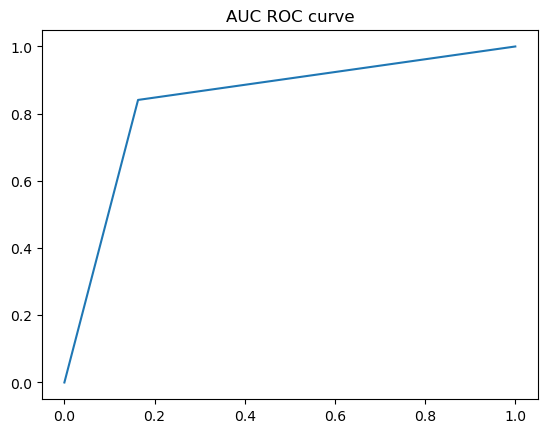

In [268]:
fpr1,tpr1,threshold=roc_curve(y_te1,rf_p3)
plt.plot(fpr1,tpr1)
plt.title("AUC ROC curve")
plt.show()

###### Conclusion
performance of the model is not that much increases 
this means that feature selection does not any that much affect on the data
in this case we can conclude that Decision tree is good fitted data. 
because its accuracy ,f1 score, recall, precision is good as compare to other models.
